In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from xml.etree.ElementTree import parse

<Element 'annotations' at 0x0000016D516F2D10>
[<Element 'image' at 0x0000016D517FEEF0>]
468.94 92.01 640.00 340.46
468 92 640 340
3.96 183.38 204.84 397.41
3 183 204 397


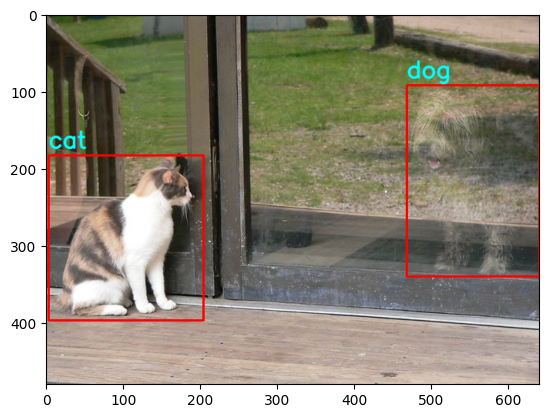

In [11]:
def read_xml(xml_path):
    root = parse(xml_path).getroot()
    print(root)
    
    img_info = root.findall('image')
    print(img_info)
    
    for image in img_info:
        bbox = image.findall('box') # <box>를 찾아 해당 node를 가져옴
        
        #이미지 크기
        width = image.attrib['width'] # 해당값을 가져옴
        heigth = image.attrib['height']
        
        #이미지 이름
        name = image.attrib['name']
        img_name = os.path.join('./data/', name)
        
        img = cv2.imread(img_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        for box in bbox:
            label = box.attrib['label']
            
            xtl = box.attrib['xtl']
            ytl = box.attrib['ytl']
            xbr = box.attrib['xbr']
            ybr = box.attrib['ybr']
            print(xtl, ytl, xbr, ybr)
            
            # XML은 값이 string으로 들어가기 때문에 string -> float -> int값으로 변경필요
            xtl_i = int(float(xtl))
            ytl_i = int(float(ytl))
            xbr_i = int(float(xbr))
            ybr_i = int(float(ybr))
            
            print(xtl_i,ytl_i,xbr_i,ybr_i)
            
            # 시각화
            
            cv2.rectangle(img, (xtl_i,ytl_i), (xbr_i,ybr_i), (255,0,0) , 2)
            img = cv2.putText(img, label, (xtl_i,ytl_i-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,255), 2, cv2.LINE_AA)
    
    plt.imshow(img)
    plt.show()
            
read_xml('./data/annotations.xml')